___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Відкрийте файл та виведіть описову статистику

In [325]:
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [326]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [327]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### 2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

Text(0.5, 1.0, 'fico')

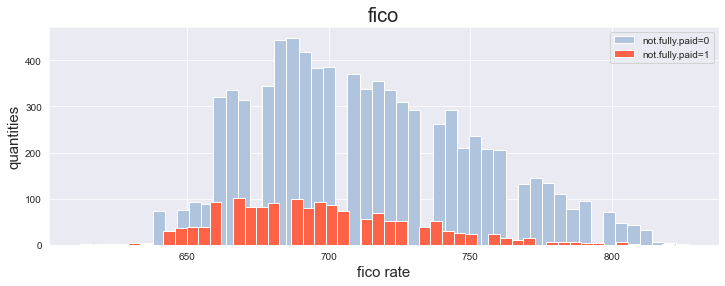

In [329]:
m = loan_data[0:][loan_data['not.fully.paid'] == 0]
n = loan_data[0:][loan_data['not.fully.paid'] == 1]
fig, axes = plt.subplots(figsize=(12,4))
plt.hist(m['fico'], color='lightsteelblue', bins=50, label='not.fully.paid=0')
plt.hist(n['fico'], color='tomato', bins=50, label='not.fully.paid=1')
sns.set_style('darkgrid')
plt.xlabel('fico rate', size=15)
plt.ylabel('quantities', size=15)
axes.legend(loc=1)
plt.title('fico', size=20)

### 3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

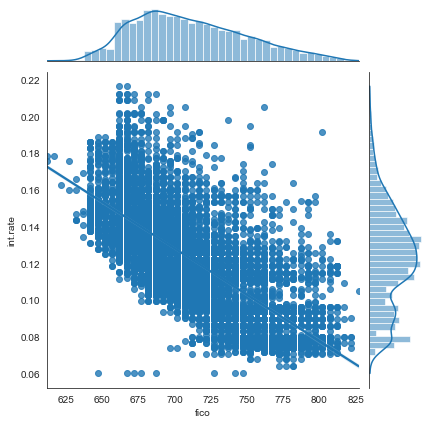

In [166]:
sns.jointplot(data=loan_data[['fico','int.rate']], x="fico", y="int.rate", kind="reg")
sns.set_style('white')

### 4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

Text(0.5, 1.0, 'credit policy')

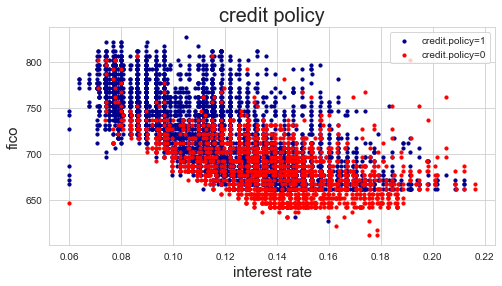

In [159]:
l = loan_data[0:][loan_data['credit.policy'] == 1]
k = loan_data[0:][loan_data['credit.policy'] == 0]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter(l['int.rate'], l['fico'], s=10, c='darkblue', marker="o", label='credit.policy=1')
ax.scatter(k['int.rate'], k['fico'], s=10, c='red', marker="o", label='credit.policy=0')
sns.set_style('whitegrid')
plt.legend(loc='upper right');
ax.set_xlabel('interest rate', size=15)
ax.set_ylabel('fico', size=15)
plt.title('credit policy', size=20)

### 5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [171]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [330]:
dummies = pd.get_dummies(loan_data["purpose"])
dummies.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [331]:
del loan_data["purpose"]
loan_data = pd.concat([loan_data, dummies],axis=1, join="inner")
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


### 6. Розбийте датасет на тестві та трейнові дані

In [332]:
y = loan_data['credit.policy']
X = loan_data.drop('credit.policy',axis=1)

In [333]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 7. Моделювання
### Логістична регресія

In [334]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(max_iter=200)
model_1.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [335]:
model_1.coef_

array([[-6.40368206e-03,  2.02884852e-03, -9.04637669e-02,
        -1.30251608e-02,  5.65877227e-03,  2.22301418e-04,
        -2.78835964e-05, -1.02066558e-02, -9.11569877e-01,
        -4.05816738e-02, -1.35676354e-02, -4.18612975e-02,
        -1.36048840e-02,  6.54450494e-03,  4.04108353e-03,
        -4.91968424e-03, -2.15555576e-03,  1.29527907e-03,
        -2.24188612e-03]])

In [336]:
model_1.score(X_train,y_train)

0.895719133385539

In [337]:
model_1.score(X_test, y_test)

0.9044885177453027

In [385]:
predictions_1 = model_1.predict(X_test)

In [389]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71       366
           1       0.91      0.97      0.94      1550

    accuracy                           0.90      1916
   macro avg       0.88      0.79      0.83      1916
weighted avg       0.90      0.90      0.90      1916



|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       TN         |       FP         |
|**Фактически** `1`  |       FN         |       TP         | 

In [390]:
matrix_1 = confusion_matrix(y_test, predictions_1)
matrix_1 = pd.DataFrame(matrix_1)
print(matrix_1)

     0     1
0  222   144
1   39  1511


|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |         222         |       144         |
|**Фактически** `1`  |          39         |       1511         | 

In [393]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_1)))

MAE: 0.09551148225469729
MSE: 0.09551148225469729
RMSE: 0.30904932010068764


In [343]:
dict_with_result = {}

In [344]:
dict_with_result['LogisticRegression'] = f'Test R^2 = {round(model_1.score(X_test, y_test), 4)}'

### Дерево рішень

In [345]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

for i in range(1,11):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    print(f'qty_depth = {i} Score = {dtree.score(X_train,y_train)}')

qty_depth = 1 Score = 0.8976768467762987
qty_depth = 2 Score = 0.9496215087444532
qty_depth = 3 Score = 0.9693291568780997
qty_depth = 4 Score = 0.9787261811537458
qty_depth = 5 Score = 0.9873401200730879
qty_depth = 6 Score = 0.990602975724354
qty_depth = 7 Score = 0.9915165753067084
qty_depth = 8 Score = 0.993474288697468
qty_depth = 9 Score = 0.9939963456016706
qty_depth = 10 Score = 0.9968676585747847


In [346]:
model_2 = DecisionTreeClassifier(max_depth=10)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [347]:
predictions_2 = model_2.predict(X_test)

In [348]:
model_2.score(X_train,y_train)

0.9968676585747847

In [349]:
dict_with_result['DecisionTreeClassifier'] = f'Test R^2 = {round(model_2.score(X_test, y_test), 4)}'

In [291]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66643 sha256=0b295cf9962a3825d48bda3253fffe7beff79467b9e371ad541ffee5f6d48b5b
  Stored in directory: c:\users\alyona\appdata\local\pip\cache\wheels\9e\37\2c\3b30269ca762b6bb992fd0abb640f3e384c290e719597fddbc
Successfully built dtreeviz


In [ ]:
from dtreeviz.trees import *
viz = dtreeviz(dtree,
               X,
               y,
               target_name='credit.policy',
               )
              
viz.view()

[Text(466.41825000000006, 622.669090909091, 'X[8] <= 3.5\ngini = 0.315\nsamples = 7662\nvalue = [1501, 6161]'),
 Text(316.8045, 563.3672727272727, 'X[4] <= 659.5\ngini = 0.173\nsamples = 6670\nvalue = [638, 6032]'),
 Text(252.77400000000003, 504.0654545454546, 'X[4] <= 634.5\ngini = 0.014\nsamples = 283\nvalue = [281, 2]'),
 Text(239.38200000000003, 444.7636363636364, 'X[5] <= 1304.021\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(225.99, 385.4618181818182, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(252.77400000000003, 385.4618181818182, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(266.166, 444.7636363636364, 'gini = 0.0\nsamples = 277\nvalue = [277, 0]'),
 Text(380.83500000000004, 504.0654545454546, 'X[5] <= 1109.5\ngini = 0.106\nsamples = 6387\nvalue = [357, 6030]'),
 Text(367.44300000000004, 444.7636363636364, 'gini = 0.0\nsamples = 137\nvalue = [137, 0]'),
 Text(394.22700000000003, 444.7636363636364, 'X[6] <= 105421.0\ngini = 0.068\nsamples = 6250\nvalue = [220, 6

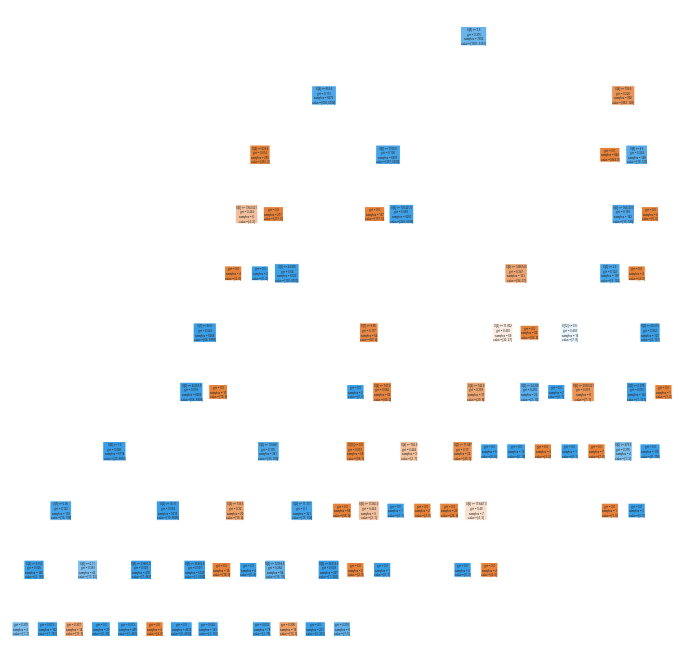

In [302]:
from sklearn import tree
plt.figure(figsize=(12,12)) 
tree.plot_tree(model_2, filled=True,  rounded=True)

In [350]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       366
           1       0.99      0.99      0.99      1550

    accuracy                           0.99      1916
   macro avg       0.98      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



In [351]:
matrix_2 = confusion_matrix(y_test, predictions_2)
matrix_2 = pd.DataFrame(matrix_2)
print(matrix_2)

     0     1
0  356    10
1   11  1539


|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       356         |       10         |
|**Фактически** `1`  |       11         |       1539         | 

In [394]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))

MAE: 0.010960334029227558
MSE: 0.010960334029227558
RMSE: 0.1046916139393579


### Random Forest

In [352]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)

dict_with_result['RandomForestClassifier'] = f'Test R^2 = {round(model_3.score(X_test, y_test), 4)}'

In [354]:
model_3.score(X_train, y_train)

1.0

In [355]:
model_3.score(X_test,y_test)

0.988517745302714

In [356]:
predictions_3 = model_3.predict(X_test)

In [357]:
print(classification_report(y_test,predictions_3))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       366
           1       0.99      1.00      0.99      1550

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



In [358]:
matrix_3=confusion_matrix(y_test,predictions_3)
matrix_3 = pd.DataFrame(matrix_3)
print(matrix_3)

     0     1
0  348    18
1    4  1546


|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       348         |       18         |
|**Фактически** `1`  |       4         |       1546         | 

In [396]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_3))
print('MSE:', metrics.mean_squared_error(y_test, predictions_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_3)))

MAE: 0.011482254697286013
MSE: 0.011482254697286013
RMSE: 0.10715528310487549


### XGBoost

In [359]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [364]:
import xgboost as xgb
from xgboost import XGBClassifier

model_4 = xgb.XGBClassifier(n_estimators=200)
model_4

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [365]:
model_4.fit(X_train, y_train)

[23:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [367]:
model_4.score(X_train, y_train)

1.0

In [368]:
model_4.score(X_test,y_test)

0.9906054279749478

In [369]:
predictions_4 = model_4.predict(X_test)

In [370]:
dict_with_result['XGBClassifier'] = f'Test R^2 = {round(model_4.score(X_test, y_test), 4)}'

In [372]:
print(classification_report(y_test,predictions_4))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       366
           1       0.99      1.00      0.99      1550

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



In [373]:
matrix_4=confusion_matrix(y_test,predictions_4)
matrix_4 = pd.DataFrame(matrix_4)
print(matrix_4)

     0     1
0  353    13
1    5  1545


|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       353         |       13         |
|**Фактически** `1`  |       5         |       1545         | 

In [397]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_4))
print('MSE:', metrics.mean_squared_error(y_test, predictions_4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_4)))

MAE: 0.009394572025052192
MSE: 0.009394572025052192
RMSE: 0.09692560046268577


### Ансамбель voting

In [374]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('m1',model_1),('m2', model_2),('m3', model_3),('m4', model_4)])
ensemble.fit(X,y)

C:\Users\Alyona\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('m1', LogisticRegression(max_iter=200)),
                             ('m2', DecisionTreeClassifier(max_depth=10)),
                             ('m3', RandomForestClassifier()),
                             ('m4',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                              

In [375]:
ensemble.score(X_train, y_train)

1.0

In [376]:
ensemble.score(X_test,y_test)

1.0

In [377]:
predictions_ensemble = ensemble.predict(X_test)

In [378]:
dict_with_result['Ensemble VotingClassifier'] = f'Test R^2 = {round(ensemble.score(X_test, y_test), 4)}'

In [380]:
print(classification_report(y_test,predictions_ensemble))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00      1550

    accuracy                           1.00      1916
   macro avg       1.00      1.00      1.00      1916
weighted avg       1.00      1.00      1.00      1916



In [381]:
matrix_ensemble=confusion_matrix(y_test,predictions_ensemble)
matrix_ensemble = pd.DataFrame(matrix_ensemble)
print(matrix_ensemble)

     0     1
0  366     0
1    0  1550


|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       366         |       0         |
|**Фактически** `1`  |       0         |       1550         | 

In [398]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ensemble))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ensemble))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ensemble)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


### Порівняння моделей

In [382]:
dict_with_result

{'LogisticRegression': 'Test R^2 = 0.9045',
 'DecisionTreeClassifier': 'Test R^2 = 0.989',
 'RandomForestClassifier': 'Test R^2 = 0.9885',
 'XGBClassifier': 'Test R^2 = 0.9906',
 'Ensemble VotingClassifier': 'Test R^2 = 1.0'}

In [391]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions_1))
print(accuracy_score(y_test, predictions_2))
print(accuracy_score(y_test, predictions_3))
print(accuracy_score(y_test, predictions_4))
print(accuracy_score(y_test, predictions_ensemble))

0.9044885177453027
0.9890396659707724
0.988517745302714
0.9906054279749478
1.0


In [384]:
# Звичайно, найбільш точні результати у ансамблю VotingClassifier: точність 1.0, помилок не виявлено. 
# Якщо ж розглядати звичайні моделі - то надзвичайно точною є XGBoost.

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [3]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(url)
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [40]:
df.describe()

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


### 1. Виведіть список унікальних міст з датасету

In [39]:
df['city'].value_counts()

Paris        1004
London        969
Antwerpen      95
Name: city, dtype: int64

In [44]:
df['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

### 2. Виведіть дату початку та кінця ведення даних

In [42]:
print("Дата початку:", df['date.utc'].min())
print("Дата кінця:", df['date.utc'].max())

Дата початку: 2019-05-07 01:00:00+00:00
Дата кінця: 2019-06-21 00:00:00+00:00


### 3. Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста

In [46]:
df['date.utc'] = pd.to_datetime(df['date.utc'])

In [52]:
df.groupby([df['date.utc'].dt.weekday, 'city'])['value'].mean()

date.utc  city     
0         Antwerpen    27.875000
          London       23.969697
          Paris        24.856250
1         Antwerpen    22.214286
          London       24.885714
          Paris        30.999359
2         Antwerpen    21.125000
          London       23.460432
          Paris        29.165753
3         Antwerpen    27.500000
          London       24.780142
          Paris        28.600690
4         Antwerpen    28.400000
          London       26.446809
          Paris        31.617986
5         Antwerpen    33.500000
          London       24.977612
          Paris        25.266154
6         Antwerpen    21.896552
          London       24.859155
          Paris        23.274306
Name: value, dtype: float64

### 4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)

Text(0, 0.5, 'NO2')

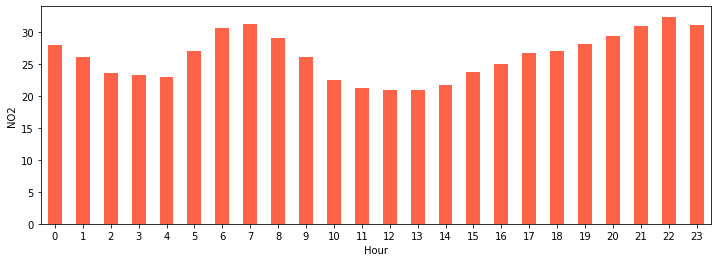

In [61]:
s = df.groupby(df['date.utc'].dt.hour)['value'].mean()
fig, axis = plt.subplots(figsize=(12, 4))
s.plot(kind='bar', rot=0, ax=axis, color="tomato")
plt.xlabel("Hour")
plt.ylabel("NO2")